In [1]:
import numpy as np
import numpy.random as npr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

In [3]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [4]:
# Loading Data
data = np.load('preprocessed64.npy')
labels = np.load('newlabel.npy')
# labels = to_categorical(labels)

In [5]:
# split
train_images , test_images , train_labels, test_labels = train_test_split(data, labels, test_size = 0.1, stratify = labels)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [6]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [7]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomZoom(0.01),
  ]
)

In [10]:
# Build the model
model_A = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu'),
    Dropout(0.08),
    Dense(10)
])

model_A.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [11]:
# fit 
epochs = 100
history = model_A.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 2s 12ms/step - loss: 2.3316 - accuracy: 0.1297 - val_loss: 2.3428 - val_accuracy: 0.1612
Epoch 2/100
95/95 [==============================] - 1s 10ms/step - loss: 2.2158 - accuracy: 0.1921 - val_loss: 2.4613 - val_accuracy: 0.1209
Epoch 3/100
95/95 [==============================] - 1s 10ms/step - loss: 2.1250 - accuracy: 0.2384 - val_loss: 2.4676 - val_accuracy: 0.2090
Epoch 4/100
95/95 [==============================] - 1s 10ms/step - loss: 2.0647 - accuracy: 0.2734 - val_loss: 2.0883 - val_accuracy: 0.2642
Epoch 5/100
95/95 [==============================] - 1s 11ms/step - loss: 2.0180 - accuracy: 0.2895 - val_loss: 2.2867 - val_accuracy: 0.2119
Epoch 6/100
95/95 [==============================] - 1s 10ms/step - loss: 1.9582 - accuracy: 0.3179 - val_loss: 2.7616 - val_accuracy: 0.1806
Epoch 7/100
95/95 [==============================] - 1s 10ms/step - loss: 1.9344 - accuracy: 0.3275 - val_loss: 2.0491 - val_accuracy: 0.2940
Epoch 

95/95 [==============================] - 1s 10ms/step - loss: 1.4645 - accuracy: 0.5168 - val_loss: 1.8352 - val_accuracy: 0.3761
Epoch 59/100
95/95 [==============================] - 1s 11ms/step - loss: 1.4647 - accuracy: 0.5230 - val_loss: 1.9543 - val_accuracy: 0.3731
Epoch 60/100
95/95 [==============================] - 1s 10ms/step - loss: 1.4572 - accuracy: 0.5270 - val_loss: 1.9543 - val_accuracy: 0.3478
Epoch 61/100
95/95 [==============================] - 1s 11ms/step - loss: 1.4622 - accuracy: 0.5261 - val_loss: 1.8342 - val_accuracy: 0.4269
Epoch 62/100
95/95 [==============================] - 1s 11ms/step - loss: 1.4630 - accuracy: 0.5195 - val_loss: 2.3034 - val_accuracy: 0.3328
Epoch 63/100
95/95 [==============================] - 1s 10ms/step - loss: 1.4525 - accuracy: 0.5212 - val_loss: 2.1827 - val_accuracy: 0.3388
Epoch 64/100
95/95 [==============================] - 1s 11ms/step - loss: 1.4640 - accuracy: 0.5182 - val_loss: 1.7777 - val_accuracy: 0.4388
Epoch 65/100

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


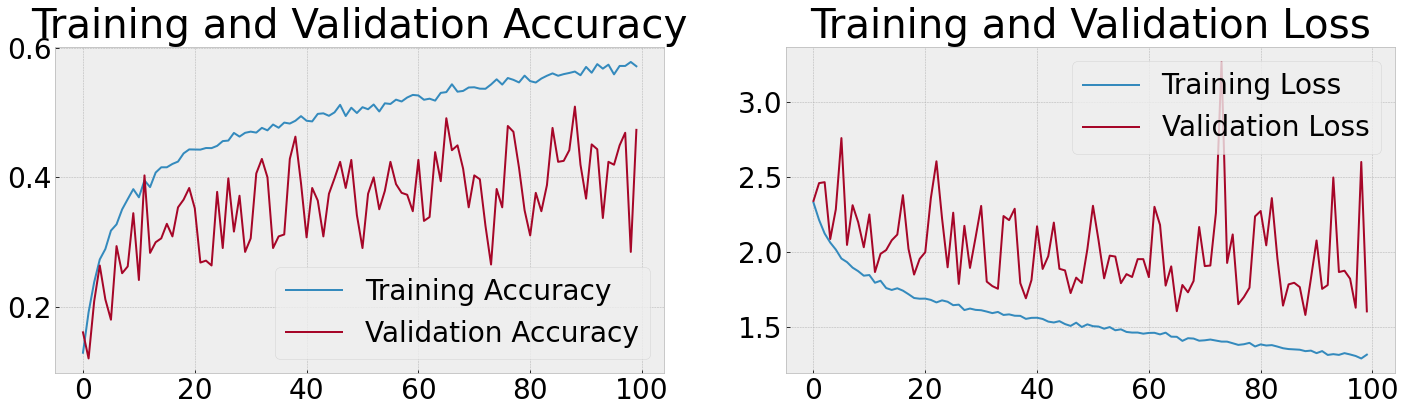

In [12]:
epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Build the model
model_B = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu'),
    Dropout(0.08),
    Dense(10)
])

model_B.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [14]:
# fit 
epochs = 100
history2 = model_B.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 2s 13ms/step - loss: 2.4376 - accuracy: 0.0919 - val_loss: 2.3468 - val_accuracy: 0.0881
Epoch 2/100
95/95 [==============================] - 1s 12ms/step - loss: 2.3637 - accuracy: 0.0977 - val_loss: 2.3325 - val_accuracy: 0.0910
Epoch 3/100
95/95 [==============================] - 1s 13ms/step - loss: 2.3596 - accuracy: 0.0951 - val_loss: 2.3246 - val_accuracy: 0.0940
Epoch 4/100
95/95 [==============================] - 1s 12ms/step - loss: 2.3482 - accuracy: 0.0969 - val_loss: 2.3176 - val_accuracy: 0.1090
Epoch 5/100
95/95 [==============================] - 1s 12ms/step - loss: 2.3408 - accuracy: 0.1055 - val_loss: 2.3107 - val_accuracy: 0.1119
Epoch 6/100
95/95 [==============================] - 1s 12ms/step - loss: 2.3295 - accuracy: 0.1074 - val_loss: 2.3044 - val_accuracy: 0.1179
Epoch 7/100
95/95 [==============================] - 1s 12ms/step - loss: 2.3264 - accuracy: 0.1123 - val_loss: 2.2981 - val_accuracy: 0.1284
Epoch 

95/95 [==============================] - 1s 12ms/step - loss: 2.0840 - accuracy: 0.2914 - val_loss: 2.0678 - val_accuracy: 0.3642
Epoch 59/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0810 - accuracy: 0.2955 - val_loss: 2.0650 - val_accuracy: 0.3463
Epoch 60/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0807 - accuracy: 0.2935 - val_loss: 2.0601 - val_accuracy: 0.3597
Epoch 61/100
95/95 [==============================] - 1s 13ms/step - loss: 2.0781 - accuracy: 0.2912 - val_loss: 2.0568 - val_accuracy: 0.3582
Epoch 62/100
95/95 [==============================] - 1s 13ms/step - loss: 2.0757 - accuracy: 0.2948 - val_loss: 2.0544 - val_accuracy: 0.3716
Epoch 63/100
95/95 [==============================] - 1s 13ms/step - loss: 2.0727 - accuracy: 0.2904 - val_loss: 2.0517 - val_accuracy: 0.3701
Epoch 64/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0664 - accuracy: 0.3021 - val_loss: 2.0481 - val_accuracy: 0.3552
Epoch 65/100

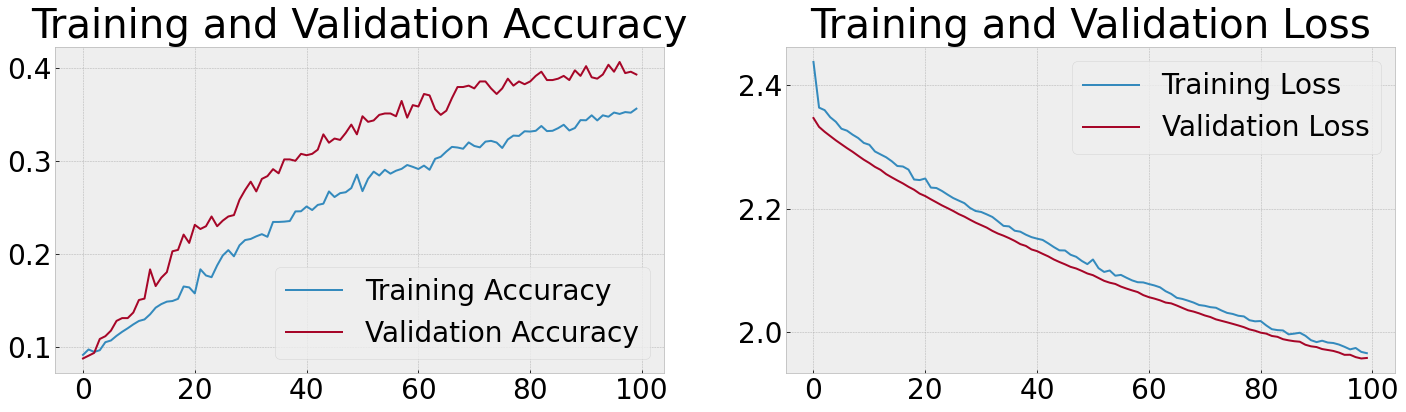

In [15]:
epochs = 100
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# Build the model
model_C = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu'),
    Dropout(0.08),
    Dense(10)
])

model_C.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [ ]:
# fit 
epochs = 100
history3 = model_C.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

In [19]:
# Build the model
model_D = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu'),
    Dropout(0.08),
    Dense(10)
])

model_D.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])


In [20]:
# fit 
epochs = 100
history4 = model_D.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 2s 13ms/step - loss: 2.7077 - accuracy: 0.1088 - val_loss: 2.2755 - val_accuracy: 0.1299
Epoch 2/100
95/95 [==============================] - 1s 12ms/step - loss: 2.3372 - accuracy: 0.1236 - val_loss: 2.2386 - val_accuracy: 0.1761
Epoch 3/100
95/95 [==============================] - 1s 12ms/step - loss: 2.2746 - accuracy: 0.1578 - val_loss: 2.1630 - val_accuracy: 0.1821
Epoch 4/100
95/95 [==============================] - 1s 12ms/step - loss: 2.2146 - accuracy: 0.1933 - val_loss: 2.0844 - val_accuracy: 0.2582
Epoch 5/100
95/95 [==============================] - 1s 12ms/step - loss: 2.1160 - accuracy: 0.2412 - val_loss: 1.9592 - val_accuracy: 0.3343
Epoch 6/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0500 - accuracy: 0.2643 - val_loss: 1.9609 - val_accuracy: 0.3418
Epoch 7/100
95/95 [==============================] - 1s 13ms/step - loss: 1.9589 - accuracy: 0.3143 - val_loss: 1.8748 - val_accuracy: 0.3896
Epoch 

95/95 [==============================] - 1s 12ms/step - loss: 1.1867 - accuracy: 0.5986 - val_loss: 1.6788 - val_accuracy: 0.5060
Epoch 59/100
95/95 [==============================] - 1s 13ms/step - loss: 1.1150 - accuracy: 0.6268 - val_loss: 1.4619 - val_accuracy: 0.5582
Epoch 60/100
95/95 [==============================] - 1s 13ms/step - loss: 1.1280 - accuracy: 0.6234 - val_loss: 1.4420 - val_accuracy: 0.5642
Epoch 61/100
95/95 [==============================] - 1s 12ms/step - loss: 1.1139 - accuracy: 0.6232 - val_loss: 1.5575 - val_accuracy: 0.4940
Epoch 62/100
95/95 [==============================] - 1s 12ms/step - loss: 1.1315 - accuracy: 0.6162 - val_loss: 1.4865 - val_accuracy: 0.5284
Epoch 63/100
95/95 [==============================] - 1s 12ms/step - loss: 1.0756 - accuracy: 0.6509 - val_loss: 1.5896 - val_accuracy: 0.5104
Epoch 64/100
95/95 [==============================] - 1s 12ms/step - loss: 1.0947 - accuracy: 0.6307 - val_loss: 1.4383 - val_accuracy: 0.5612
Epoch 65/100

In [24]:
# Build the model
model_E = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu'),
    Dropout(0.08),
    Dense(10)
])

model_E.compile(optimizer=tf.keras.optimizers.Adagrad(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])

In [25]:
# fit 
epochs = 100
history5 = model_E.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/100
95/95 [==============================] - 2s 12ms/step - loss: 2.3351 - accuracy: 0.1143 - val_loss: 2.3290 - val_accuracy: 0.1537
Epoch 2/100
95/95 [==============================] - 1s 11ms/step - loss: 2.2654 - accuracy: 0.1538 - val_loss: 2.2522 - val_accuracy: 0.1507
Epoch 3/100
95/95 [==============================] - 1s 11ms/step - loss: 2.2081 - accuracy: 0.1915 - val_loss: 2.4366 - val_accuracy: 0.1224
Epoch 4/100
95/95 [==============================] - 1s 12ms/step - loss: 2.1741 - accuracy: 0.2137 - val_loss: 2.2629 - val_accuracy: 0.1552
Epoch 5/100
95/95 [==============================] - 1s 12ms/step - loss: 2.1292 - accuracy: 0.2442 - val_loss: 2.0887 - val_accuracy: 0.3149
Epoch 6/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0944 - accuracy: 0.2617 - val_loss: 2.1708 - val_accuracy: 0.2284
Epoch 7/100
95/95 [==============================] - 1s 12ms/step - loss: 2.0645 - accuracy: 0.2852 - val_loss: 2.2454 - val_accuracy: 0.1373
Epoch 

95/95 [==============================] - 1s 11ms/step - loss: 1.6213 - accuracy: 0.4855 - val_loss: 1.7608 - val_accuracy: 0.4358
Epoch 59/100
95/95 [==============================] - 1s 12ms/step - loss: 1.6181 - accuracy: 0.4865 - val_loss: 1.7202 - val_accuracy: 0.4567
Epoch 60/100
95/95 [==============================] - 1s 12ms/step - loss: 1.6141 - accuracy: 0.4868 - val_loss: 1.7261 - val_accuracy: 0.4313
Epoch 61/100
95/95 [==============================] - 1s 12ms/step - loss: 1.6117 - accuracy: 0.4856 - val_loss: 1.7585 - val_accuracy: 0.4373
Epoch 62/100
95/95 [==============================] - 1s 11ms/step - loss: 1.6049 - accuracy: 0.4861 - val_loss: 1.7209 - val_accuracy: 0.4463
Epoch 63/100
95/95 [==============================] - 1s 11ms/step - loss: 1.6079 - accuracy: 0.4875 - val_loss: 1.7267 - val_accuracy: 0.4254
Epoch 64/100
95/95 [==============================] - 1s 11ms/step - loss: 1.5974 - accuracy: 0.4911 - val_loss: 1.6639 - val_accuracy: 0.4761
Epoch 65/100

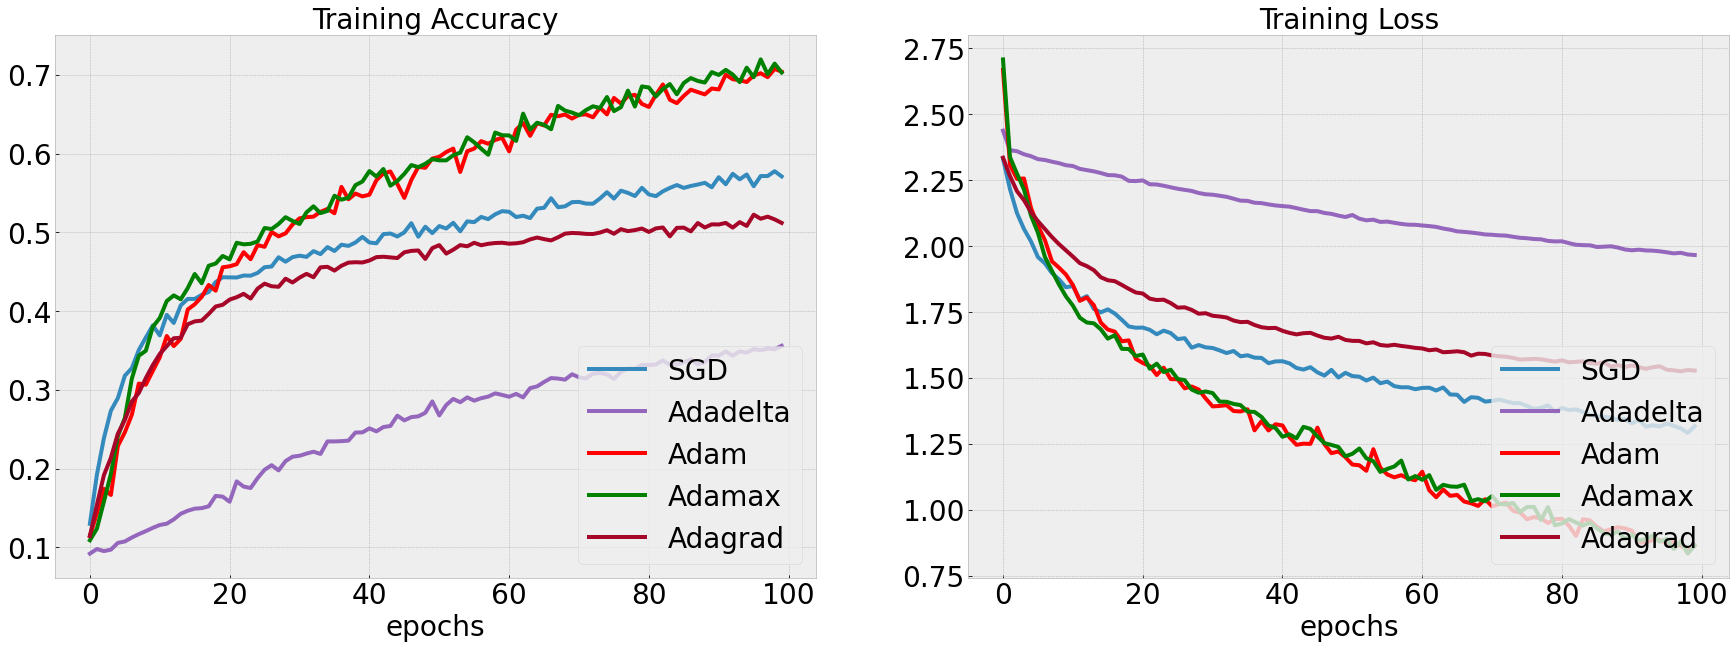

In [42]:
epochs_range = range(epochs)
fronttsize = 28

# adagrad
acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']


# adamax
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

# adam
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

#adadelta
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# SGD
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(30, 10))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='SGD',linewidth=4)
plt.plot(epochs_range, acc2, label='Adadelta',linewidth=4, color = '#9467bd')
plt.plot(epochs_range, acc3, label='Adam',linewidth=4, color = "red")
plt.plot(epochs_range, acc4, label='Adamax',linewidth=4, color = "green")
plt.plot(epochs_range, acc5, label='Adagrad',linewidth=4)
plt.legend(loc='lower right', prop={'size': fronttsize})
plt.title('Training Accuracy', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='SGD',linewidth=4)
plt.plot(epochs_range, loss2, label='Adadelta',linewidth=4, color = '#9467bd')
plt.plot(epochs_range, loss3, label='Adam',linewidth=4 , color = "red")
plt.plot(epochs_range, loss4, label='Adamax',linewidth=4, color = "green")
plt.plot(epochs_range, loss5, label='Adagrad',linewidth=4)
plt.legend(loc='lower right', prop={'size': fronttsize})
plt.title('Training Loss', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)


plt.savefig('adam.png')
plt.show()

In [64]:
plt.savefig('overfitting.png')

<Figure size 432x288 with 0 Axes>